In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from scipy.misc import comb

Populating the interactive namespace from numpy and matplotlib


### Encoder and Decoder

<img  src="encoder_decoder.png" width=500px align="left"/>

> *Information theory* is concerned with the theoretical limitations and potentials of such systems. ‘What is the best error-correcting performance we could achieve?’
*Coding theory* is concerned with the creation of practical encoding and decoding systems.

### Repetetion code:

Repetetion code reduced the probability of error by adding redundancy to **encode** and using majority vote to **decode**

e.g. $R_3$ Code:

<img  src="R3.png" width=500px align="left"/>

the probability of error of $R_N$ code (more than half of N flipped would be undetected error), the repetition code with N repetitions is:
$$ P_b = \sum_{n=(N+1)/2}^{N}  \binom{N}{n} f^{n} (1-f)^{N-n}$$

In [7]:
@vectorize
def Pb(N, f):
    err_p = 0
    for n in np.arange((N+1)/2, N+1, 1):
        err_p += comb(N,n)*f**n*(1-f)**(N-n)
    return err_p

In [8]:
N = np.arange(1,99,2)
f = 0.1
p = Pb(N,f)

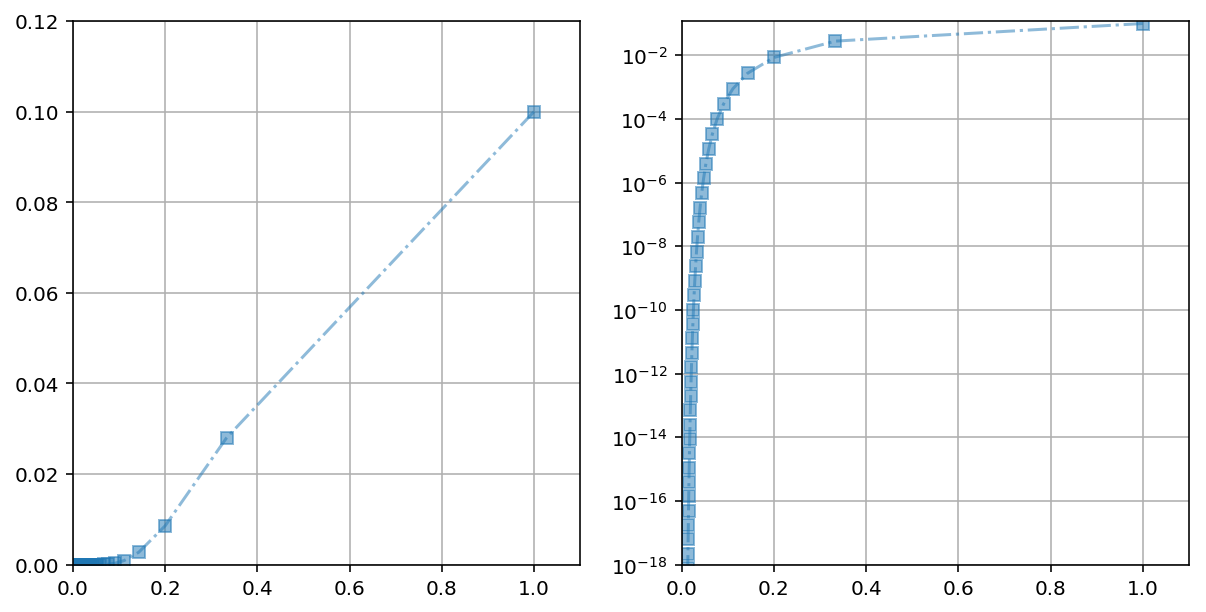

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(1./N, p, ls='-.', marker='s', alpha=.5)
ax[0].axis([0,1.1,0,0.12])
ax[0].grid(True)
ax[1].plot(1./N, p, ls='-.', marker='s', alpha=.5)
ax[1].axis([0,1.1,1e-18,0.12])
ax[1].set_yscale('log')
ax[1].grid(True)

Q1: What is the minimum N for $Pb[R_N] < 1e-15$

In [10]:
N[np.where(p<=1e-15)].min()

63

### Block codes – (7, 4) Hamming code

We would like to communicate with tiny probability of error and at a substan- tial rate. Can we improve on repetition codes? What if we **add redundancy to blocks of data instead of encoding one bit at a time**? We now study a simple block code.

Append parity check bits after blocks of data

e.g. s: 1000 ---> t: 1000**101**

<img  src="Hamming Code.png" width=350px align="left"/>
<img  src="Hamming Code Table.png" width=620px/>

<img  src="Hamming linear coding.png" width=550px align="left"/>

The decoder matrix:

<img  src="Hamming decoder.png" width=250px align="left"/>

In [11]:
G = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1], [1,1,1,0], [0,1,1,1], [1,0,1,1]]).T
H = np.array([[1, 1, 1, 0, 1, 0, 0],[0, 1, 1, 1, 0, 1, 0],[1, 0, 1, 1, 0, 0, 1]])

See why the construction of G and H make sense.

Set a signal to transmit:

In [12]:
s = np.array([0,1,0,1])

Encoding:

In [13]:
t = np.dot(G.T, s) % 2
print 's =',s
print 't =',t

s = [0 1 0 1]
t = [0 1 0 1 1 0 1]


Add noise

In [14]:
n = np.zeros((7,)).astype(int)
n[2] = 1
r = (t + n) % 2
print 't =',t
print 'n =',n
print 'r =',r

t = [0 1 0 1 1 0 1]
n = [0 0 1 0 0 0 0]
r = [0 1 1 1 1 0 1]


Decoding: (parity check)

In [15]:
z = np.dot(H,r) % 2
print 'z =',z

z = [1 1 1]


If there is no error happen, z should be zero. However, in this case, z = [1,1,1] which means **if one bit is wrong that leads to three parity errors. That can only be n[2] error**

On the other hand, this means H can only correct one bit error. Therefore the block error for Hamming(7,4) is:

$$ P_B = \sum_{k=2}^{k=7} \binom{7}{k} f^{k} (1-f)^{7-k} $$

The bit error probability:
$$ P_b = \frac{3}{7} \sum_{k=2}^{k=7} \binom{7}{k} f^{k} (1-f)^{7-k} $$

In [16]:
Hamming_error = lambda f: 3./7*sum([comb(7,k)*f**k*(1-f)**(7-k) for k in np.arange(2,8,1)])

In [17]:
Hamming_error(0.1)

0.064154742857142885

In [18]:
Hamming_rate = 4./7

In [19]:
ax[0].plot(Hamming_rate, Hamming_error(0.1), 'ro')
ax[1].plot(Hamming_rate, Hamming_error(0.1), 'ro')

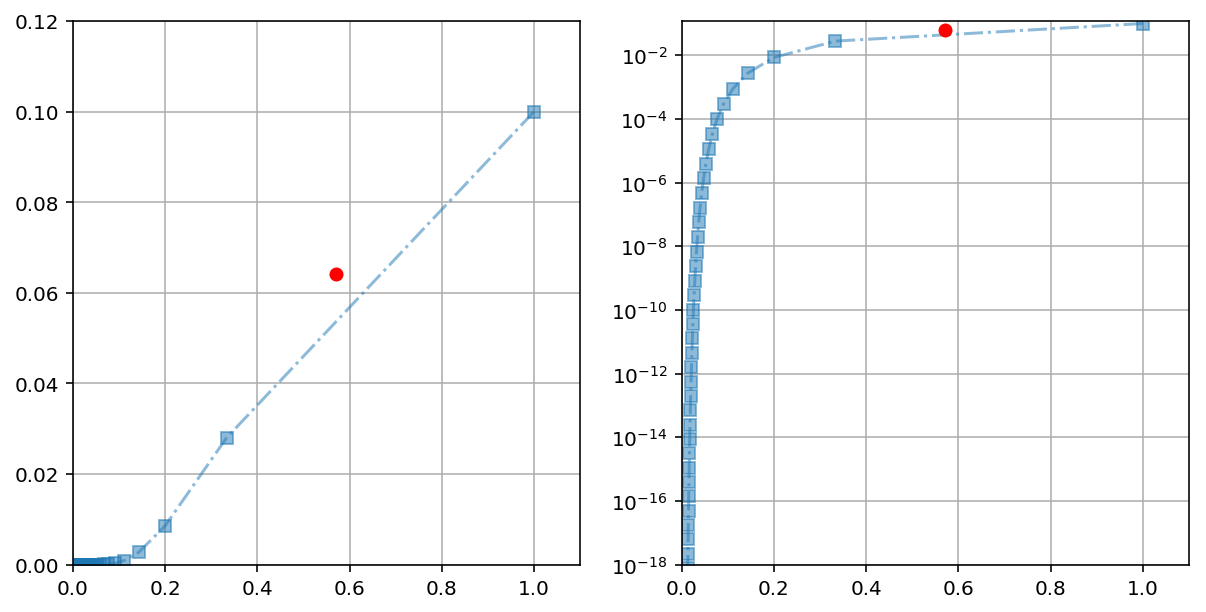

In [20]:
fig

The red dot is Hamming(7,4) coding

### Information content

The `information content`:  $ \displaystyle I(p) = log{\frac{1}{p}} $

In [21]:
p = np.arange(0.001,1,0.001)

In [22]:
I = lambda p: log2(1/p)

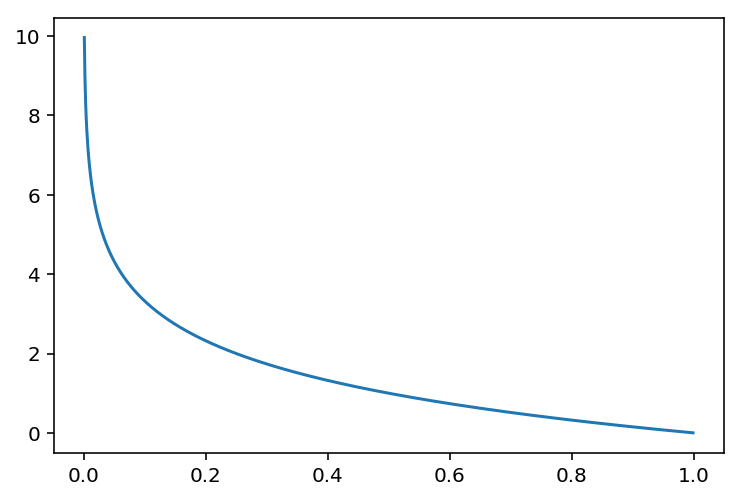

In [23]:
plot(p, I(p))

The `probability modulated information content`: $\displaystyle plog{\frac{1}{p}} $

max = 0.368
1/e = 0.367879441171


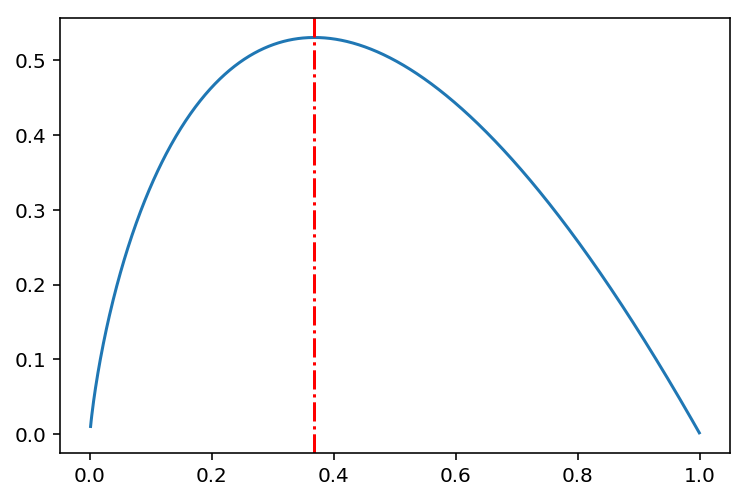

In [25]:
p_info_content = p*I(p)
plot(p, p_info_content)
axvline(p[p_info_content.argmax()], c='r', ls='-.')
print 'max =',p[p_info_content.argmax()]
print '1/e =',1/e

Now, every PMF has its addtive entropy. For example, P = {p1=0.2, p2=0.4, p3=0.0.4}

In [26]:
entropy = .2*I(.2) + .4*I(.4) + .4*I(.4)
print entropy,'bits'

1.52192809489 bits


In [27]:
entropy = .3333*I(.3333) + .3333*I(.3333) + .3333*I(.3333)
print entropy,'bits'

1.58494826676 bits


### Entropy

For `uniform distribution`, the entropy is:
$$ H(N) = \sum_{1}^{N} p log(\frac{1}{p}) = \sum_{1}^{N} \frac{1}{N} log(N) = log(N) $$

In [28]:
log2(3)

1.5849625007211561

In [29]:
uniform_entropy = lambda x: x*1/x*I(1/x)

In [30]:
uniform_entropy(3.)

1.5849625007211561

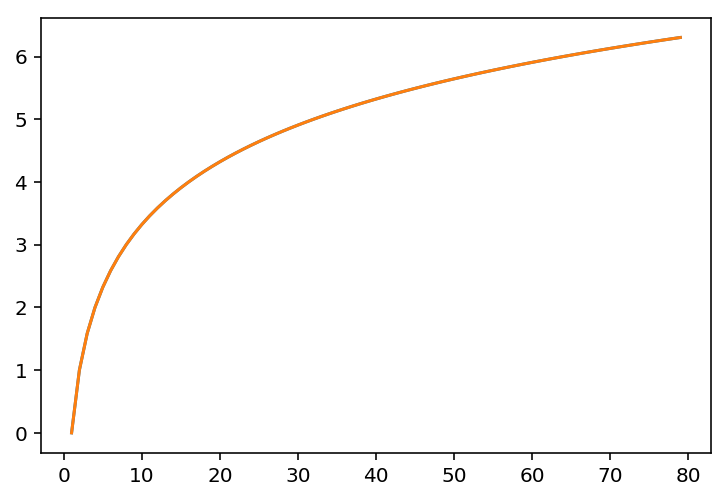

In [32]:
N = np.arange(1,80,1.)
plot(N, uniform_entropy(N))
plot(N, log2(N))

For `bernoulli distribution`, the **entropy** is:

$$ H_2(p) = {p}log{\frac{1}{p}} + (1-p)log{\frac{1}{1-p}} $$

In [33]:
H = lambda p: p*log2(1/p) + (1-p)*log2(1/(1-p))

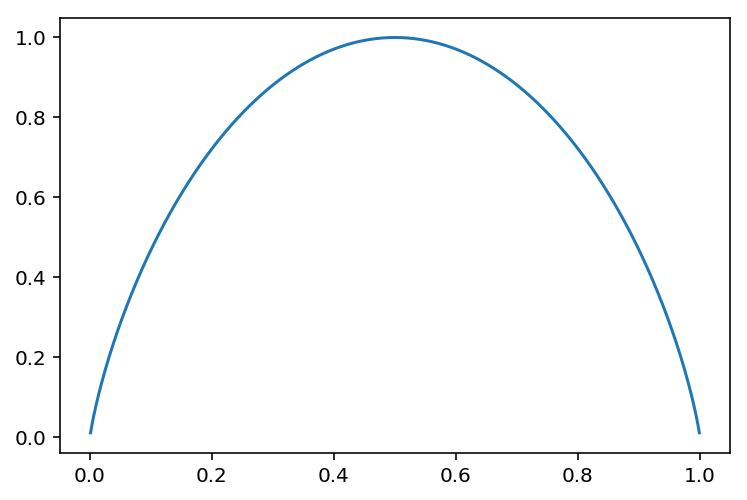

In [34]:
plot(p,H(p))

### Connection between $N \choose r$ and binomial entropy

$$ log{N \choose r} \simeq NH_2(\frac{r}{N}) $$
or, equivalently
$$ {N \choose r} \simeq 2^{NH_2(\frac{r}{N})} $$

Precisely, 
$$ log{N \choose r} \simeq NH_2(\frac{r}{N}) - {0.5}log[{2\pi{N}{\frac{N-r}{N}}{\frac{r}{N}}}] $$

In [35]:
N = 100.
r = 15.

In [36]:
log2(comb(N,r))

57.813843790851728

In [37]:
N*H(r/N) - .5*log2(2*pi*(N-r)*r/N)

57.822069735918134

In [38]:
r = 10.
N = np.arange(r+1,r*3,1)

In [39]:
def log_binomial_choice(N,r):
    return log2(comb(N,r))

In [40]:
def log_binomial_choice_appr(N,r):
    return N*H(r/N) - .5*log2((N-r)*r/N) - .5*log2(2*pi)

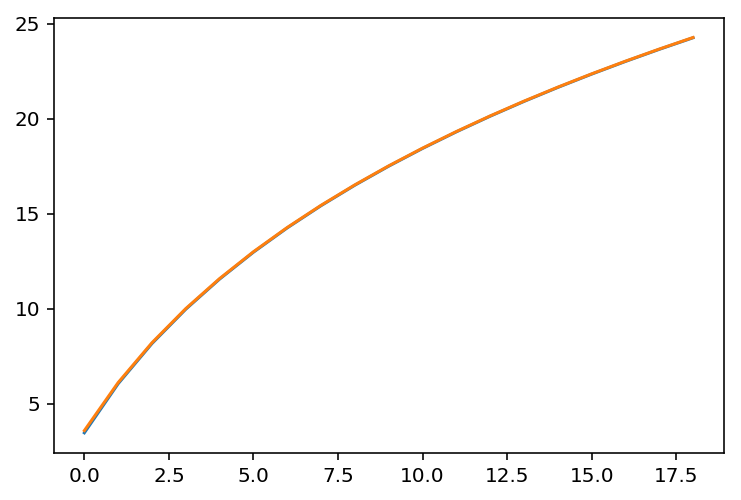

In [42]:
plot(log_binomial_choice(N,r))
plot(log_binomial_choice_appr(N,r))

In [2]:
# t = np.arange(-3,3,0.0000104)
# x = 1.04*np.sqrt(abs(t)) + np.sqrt(np.cos(t)) * np.cos(0x0104*t)
# plot(t,x,'.')